In [1]:
import pandas as pd, requests, os, json, re, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
#from bs4 import BeautifulSoup
pd.set_option('display.max_colwidth', 1000)
%matplotlib inline

## Gather

In [2]:
# Gathering data from a website using requests module

url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)

with open(url.split('/')[-1],'wb') as file:
    file.write(response.content)
    
    
img_pred=pd.read_csv('image-predictions.tsv','\t')

In [3]:
# Gathering data from a csv data source

twt_arch=pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
# For this project I'm using the available tweet-json.txt file rather than creating a twitter account.

url1=r'https://s3.amazonaws.com/video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
resp=requests.get(url1)

with open('tweet-json.txt') as f_obj:
    contents=f_obj.read()
    
twt_api=pd.read_json(url1,lines=True)

## Assess

In [5]:
twt_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [6]:
twt_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [7]:
twt_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [8]:
img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [9]:
img_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [10]:
img_pred.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1542,791312159183634433,https://pbs.twimg.com/media/CvtONV4WAAAQ3Rn.jpg,4,miniature_pinscher,0.892925,True,toy_terrier,0.095524,True,Doberman,0.003544,True
1523,788150585577050112,https://pbs.twimg.com/media/CvASw6dWcAQmo3X.jpg,3,chow,0.814145,True,Pomeranian,0.112704,True,Chihuahua,0.015883,True
1045,712809025985978368,https://pbs.twimg.com/media/CeRoBaxWEAABi0X.jpg,1,Labrador_retriever,0.868671,True,carton,0.095095,False,pug,0.007651,True
1375,763103485927849985,https://pbs.twimg.com/media/CpcWknPXYAAeLP9.jpg,2,seat_belt,0.685821,False,ice_bear,0.081597,False,chow,0.039085,True
1941,861005113778896900,https://pbs.twimg.com/media/C_LnlF5VoAEsL1K.jpg,1,German_shepherd,0.507951,True,Pembroke,0.136113,True,muzzle,0.075764,False


In [11]:
twt_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [12]:
twt_api.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}",39467,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com', 'url': 'https://t.co/N7sNNHAEXS', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 3200889, 'friends_count': 104, 'listed_count': 2784, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 114031, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 5288, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://ab..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}}}]}","{'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'l

In [13]:
# Incorrect names in name column with names available in text column

twt_arch[((twt_arch['name'].str.islower())| (twt_arch['name']=='None'))&((twt_arch['text'].str.contains('named'))|(twt_arch['text'].str.contains('name is')))][['name','text']]

,name,text
35,None,I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk
168,None,Sorry for the lack of posts today. I came home from school and had to spend quality time with my puppo. Her name is Zoey and she's 13/10 https://t.co/BArWupFAn0
603,None,RT @dog_rates: This a Norwegian Pewterschmidt named Tickles. Ears for days. 12/10 I care deeply for Tickles https://t.co/0aDF62KVP7
843,None,His name is Charley and he already has a new set of wheels thanks to donations. I heard his top speed was also increased. 13/10 for Charley
852,my,This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB
1678,None,We normally don't rate bears but this one seems nice. Her name is Thea. Appears rather fluffy. 10/10 good bear https://t.co/fZc7MixeeT
1734,None,This pup's name is Sabertooth (parents must be cool). Ears for days. Jumps unannounced. 9/10 would pet diligently https://t.co/iazoiNUviP
1853,a,This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI
1955,a,This is a Lofted Aphrodisiac Terrier named Kip. Big fan of bed n breakfasts. Fits perfectly. 10/10 would pet firmly https://t.co/gKlLpNzIl3
2034,a,This is a Tuscaloosa Alcatraz named Jacob (Yacōb). Loves to sit in swing. Stellar tongue. 11/10 look at his feet https://t.co/2IslQ8ZSc7


In [14]:
# Incorrect rating in rating_numerator column with float type rating in text column

twt_arch[twt_arch['text'].str.contains(r'(\d+\.\d*\/\d+)')][['rating_numerator','text']]

C:\Users\Vinit\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


,rating_numerator,text
45,5,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948"
340,75,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…"
695,75,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"
763,27,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
1689,5,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace
1712,26,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD


In [15]:
# The source column consists of the url showing the source of the tweets, the data type is incorrect. 
#Also, we can extract the source info for analysis

twt_api['source'].unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [16]:
# Missing dog stage values. For some the stage value is available in the text field

test_list=twt_arch[(twt_arch['doggo']=='None')&(twt_arch['floofer']=='None')&(twt_arch['pupper']=='None')&(twt_arch['puppo']=='None')]['tweet_id']

for tw in test_list[:5]:
    print(twt_arch[twt_arch['tweet_id']==tw][['text','doggo','floofer','pupper','puppo']].head())

                                                                                                            text  \
0  This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   

  doggo floofer pupper puppo  
0  None    None   None  None  
                                                                                                                                                                 text  \
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   

  doggo floofer pupper puppo  
1  None    None   None  None  
                                                                                                                                                text  \
2  This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB   


### Quality Issues:

- Missing expanded_urls which are images
- Data contains retweeted tweets
- Incorrect dog names
- Missing values in 'doggo','floofer','pupper','puppo' columns
- Missing values in dog names column
- Incorrect datatype for timestamp column
- Source column contains link
- Incorrect data type for source column
- Float ratings interpreted incorrectly
- Incorrect ratings_numerator datatype

### Tidiness Issues:

- Combining tweeter_archieve_clean and image_predication_clean tables
- Creating a single column 'dog_stages' for values doggo, floofer, pupper, puppo

## Clean

In [17]:
#Create copies of the original DataFrames

tweeter_archieve_clean=twt_arch.copy()
image_predications_clean=img_pred.copy()
tweeter_api_clean=twt_api.copy()

### Define:

1- Remove incorrect dog names and update correct dog names where ever possible. Identify names in lowercase or the ones that contains None

### Code:

Code to clean the names in lowercase or None values

In [18]:
# Some names are avilable in the text field after the string 'named'
def extract_named(text,twt_id):
    nm=text[text.find(' ',text.find('named')+len('named')):text.find(' ',text.find('named')+len('named')+1)].strip().title().replace('.','')
    tweeter_archieve_clean.loc[tweeter_archieve_clean['tweet_id']==twt_id,['name']]=nm

    
    
# Some names are avilable in the text field after the string 'name is'    
def extract_name_is(text,twt_id):
    nm1=text[text.find(' ',text.find('name is')+len('name is')):text.find(' ',text.find('name is')+len('name is')+1)].strip().title().replace('.','')
    tweeter_archieve_clean.loc[tweeter_archieve_clean['tweet_id']==twt_id,['name']]=nm1

In [19]:
# Get the tweet ids for text columns that contains strings 'named' and 'name is'

nm1=tweeter_archieve_clean[((tweeter_archieve_clean['name'].str.islower() | (tweeter_archieve_clean['name']=='None')) & (tweeter_archieve_clean['text'].str.contains('named')))]['tweet_id'].tolist()
nm2=tweeter_archieve_clean[((tweeter_archieve_clean['name'].str.islower() | (tweeter_archieve_clean['name']=='None')) & (tweeter_archieve_clean['text'].str.contains('name is')))]['tweet_id'].tolist()

In [20]:
# for loops to update the name column with the extracted names from the text field
for t1_id in nm1:
    tweeter_archieve_clean[tweeter_archieve_clean['tweet_id']==t1_id]['text'].apply(lambda text:extract_named(str(text),t1_id))
    
for t2_id in nm2:
    tweeter_archieve_clean[tweeter_archieve_clean['tweet_id']==t2_id]['text'].apply(lambda text:extract_name_is(str(text),t2_id))

In [21]:
# For tweets with no names in text field and has lowercase values in name column, we are updating the name to None
tweeter_archieve_clean.loc[tweeter_archieve_clean['name'].str.islower(),['name']]='None'

### Test:

Code to check the name column for the updated tweet_ids

In [22]:
tweeter_archieve_clean['name'].sort_values()

1035            Abby
1021            Abby
938              Ace
1933            Acro
1327           Adele
1934           Aiden
77               Aja
480            Akumi
820               Al
875           Albert
1954          Albert
412            Albus
144            Albus
1115         Aldrick
2046       Alejandro
374        Alexander
1189    Alexanderson
486              Alf
367            Alfie
858            Alfie
1616           Alfie
2238           Alfie
661            Alfie
2235         Alfonso
2161         Alfredo
51              Alfy
201            Alice
1701           Alice
2146         Alphred
1495           Amber
            ...     
986          Winston
280          Winston
816          Winston
407          Winston
1243         Winston
877           Wishes
1451           Wyatt
174            Wyatt
410            Wyatt
1853           Wylie
1378            Yoda
43              Yogi
622             Yogi
1409           Yukon
1332            Zara
2206            Zeek
547          

In [23]:
# To check for any lowercase values in name column
sum(tweeter_archieve_clean['name'].str.islower())

0

In [24]:
# Names updated with code
for e in [nm1,nm2]:
    for j in e:
        print(tweeter_archieve_clean[tweeter_archieve_clean['tweet_id']==j]['name'])

603    Tickles
Name: name, dtype: object
1853    Wylie
Name: name, dtype: object
1955    Kip
Name: name, dtype: object
2034    Jacob
Name: name, dtype: object
2066    Rufus
Name: name, dtype: object
2116    Spork
Name: name, dtype: object
2125    Cherokee
Name: name, dtype: object
2128    Hemry
Name: name, dtype: object
2146    Alphred
Name: name, dtype: object
2161    Alfredo
Name: name, dtype: object
2166    Zeus
Name: name, dtype: object
2191    Leroi
Name: name, dtype: object
2204    Berta
Name: name, dtype: object
2218    Chuk
Name: name, dtype: object
2227    Guss
Name: name, dtype: object
2235    Alfonso
Name: name, dtype: object
2249    Cheryl
Name: name, dtype: object
2255    Jessiga
Name: name, dtype: object
2264    Klint
Name: name, dtype: object
2269    Tickles
Name: name, dtype: object
2273    Kohl
Name: name, dtype: object
2304    Pepe
Name: name, dtype: object
2311    Octaviath
Name: name, dtype: object
2314    Johm
Name: name, dtype: object
35    Howard
Name: name, dtyp

### Define:

2- Update the rating_nuerator column as float and update the column with values where rating is available in text column

### Code:

In [25]:
# Converting and updating the rating numerator as float data type

tweeter_archieve_clean['rating_numerator']=tweeter_archieve_clean['rating_numerator'].astype('float')

def update_rating_nm(text,tweet_id):
    fl=float(re.findall(r'(\d*\.\d*\/\d+)',text)[0].split('/')[0])
    tweeter_archieve_clean.loc[tweeter_archieve_clean['tweet_id']==tweet_id,['rating_numerator']]=fl

In [26]:
# Checking for text with float type rating

fl_ids=tweeter_archieve_clean[tweeter_archieve_clean['text'].str.contains(r'(\d+\.\d*\/\d+)')]['tweet_id']
for ids in fl_ids:
    tweeter_archieve_clean[tweeter_archieve_clean['tweet_id']==ids]['text'].apply(lambda text:update_rating_nm(text,ids))

C:\Users\Vinit\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


### Test:

In [27]:
#Checking the updated ratings

for ids in fl_ids:
    print(tweeter_archieve_clean[tweeter_archieve_clean['tweet_id']==ids]['rating_numerator'])

45    13.5
Name: rating_numerator, dtype: float64
340    9.75
Name: rating_numerator, dtype: float64
695    9.75
Name: rating_numerator, dtype: float64
763    11.27
Name: rating_numerator, dtype: float64
1689    9.5
Name: rating_numerator, dtype: float64
1712    11.26
Name: rating_numerator, dtype: float64


### Define:
3- Change the datatype of column `source` to category

### Code:

In [28]:
tweeter_archieve_clean['source']=tweeter_archieve_clean['source'].astype('category')

### Define:

4- Change the data type of column timestamp to timestamp

### Code:


In [29]:
tweeter_archieve_clean['timestamp']=pd.to_datetime(tweeter_archieve_clean['timestamp'])

### Test:

In [30]:
tweeter_archieve_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null category
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: categor

### Define:

5- Update dog stage columns where ever possible

### Code:

In [31]:
# Check and update the dog stage
stg_list_id=[]
def chk_stage(text,i):
    for stage in ['doggo','floofer','pupper','puppo']:
        if stage in text.lower():
            if stage=='doggo':
                tweeter_archieve_clean.loc[tweeter_archieve_clean['tweet_id']==i,['doggo']]=stage
            elif stage=='floofer':
                tweeter_archieve_clean.loc[tweeter_archieve_clean['tweet_id']==i,['floofer']]=stage
            elif stage=='pupper':
                tweeter_archieve_clean.loc[tweeter_archieve_clean['tweet_id']==i,['pupper']]=stage
            else:
                tweeter_archieve_clean.loc[tweeter_archieve_clean['tweet_id']==i,['puppo']]=stage
            stg_list_id.append(i)

In [32]:
# dog stage columns as None

test_list=tweeter_archieve_clean[(tweeter_archieve_clean['doggo']=='None')&(tweeter_archieve_clean['floofer']=='None')&(tweeter_archieve_clean['pupper']=='None')&(tweeter_archieve_clean['puppo']=='None')]['tweet_id'].tolist()

for i in test_list:
    tweeter_archieve_clean[tweeter_archieve_clean['tweet_id']==i]['text'].apply(lambda x:chk_stage(str(x),i))


### Test:

In [33]:
# Check the columns that are updated

for i in stg_list_id:
    print(tweeter_archieve_clean[tweeter_archieve_clean['tweet_id']==i][['text','name','doggo','floofer','pupper','puppo']])

                                                                                                                                           text  \
54  This is Gary. He couldn't miss this puppertunity for a selfie. Flawless focusing skills. 13/10 would boop intensely https://t.co/7CSWCl8I6s   

    name doggo floofer  pupper puppo  
54  Gary  None    None  pupper  None  
                                                                                                                                             text  \
83  I can say with the pupmost confidence that the doggos who assisted with this search are heroic as h*ck. 14/10 for all https://t.co/8yoc1CNTsu   

    name  doggo floofer pupper puppo  
83  None  doggo    None   None  None  
                                                                                                                                                                    text  \
85  Meet Venti, a seemingly caffeinated puppoccino. She was just informed the 

                                                                                                            text  \
1712  Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD   

      name doggo floofer  pupper puppo  
1712  None  None    None  pupper  None  
                                                                                                  text  \
1743  Crazy unseen footage from Jurassic Park. 10/10 for both dinosaur puppers https://t.co/L8wt2IpwxO   

      name doggo floofer  pupper puppo  
1743  None  None    None  pupper  None  
                                                                        text  \
1779  IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq   

      name doggo floofer  pupper puppo  
1779  None  None    None  pupper  None  
                                                                                                       text  \
1826  Hope your Monday isn't too awf

#### Joining tables to make a single tweeter_archieve_clean table

In [34]:
# Joining the tables tweeter_archieve_clean and image_predications_clean

tweeter_archieve_clean=tweeter_archieve_clean.merge(image_predications_clean,how='inner',left_on='tweet_id',right_on='tweet_id')

In [35]:
# Selecting only the required columns from tweeter_api_clean

tweeter_api_clean=tweeter_api_clean[['id','favorite_count','favorited','retweet_count','retweeted']]

In [36]:
# Joining the tweeter_archieve_clean table with tweeter_api_clean table
tweeter_archieve_clean=tweeter_archieve_clean.merge(tweeter_api_clean,how='inner',left_on='tweet_id',right_on='id')

In [37]:
# Droping the extra id column resuting from joining tables
tweeter_archieve_clean.drop(columns='id',axis=1,inplace=True)
tweeter_archieve_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 32 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null datetime64[ns, UTC]
source                        2073 non-null category
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null float64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
jpg_url           

### Define:
6- Remove retweeted tweets from data

### Code:

In [38]:
tweeter_archieve_clean=tweeter_archieve_clean[tweeter_archieve_clean['retweeted_status_id'].isna()]

### Define:
7- Remove retweeted columns

### Code:

In [39]:
tweeter_archieve_clean.drop(columns=['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1,inplace=True)

In [40]:
tweeter_archieve_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 29 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null datetime64[ns, UTC]
source                   1994 non-null category
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null float64
rating_denominator       1994 non-null int64
name                     1994 non-null object
doggo                    1994 non-null object
floofer                  1994 non-null object
pupper                   1994 non-null object
puppo                    1994 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2       

### Define:
8- Combine columns doggo, floofer, pupper, puppo into single column called dog_stages

### Code:

In [41]:
def chk_dog_stg(twt_id):
    for x in ['doggo','floofer','pupper','puppo']:
        if (tweeter_archieve_clean[tweeter_archieve_clean['tweet_id']==twt_id][x]!='None').bool():
            return x
    return 'None'

In [42]:
tweeter_archieve_clean['dog_stage']=tweeter_archieve_clean['tweet_id'].apply(lambda x:chk_dog_stg(x))

### Define:

9- Change the data type of dog stage column to category

### Code

In [43]:
tweeter_archieve_clean['dog_stage']=tweeter_archieve_clean['dog_stage'].astype('category')

In [44]:
# drop columns in_reply_to_status_id, in_reply_to_user_id
tweeter_archieve_clean.drop(columns=['in_reply_to_status_id','in_reply_to_user_id'],axis=1,inplace=True)

### Test:

In [45]:
tweeter_archieve_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 28 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null datetime64[ns, UTC]
source                1994 non-null category
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null int64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    

In [46]:
tweeter_archieve_clean[tweeter_archieve_clean['tweet_id']==781163403222056960]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,favorited,retweet_count,retweeted,dog_stage
591,781163403222056960,2016-09-28 16:07:23+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","We normally don't rate lobsters, but this one appears to be a really good lobster. 10/10 would pet with caution https://t.co/YkHc7U7uUy",https://twitter.com/dog_rates/status/781163403222056960/photo/1,10.0,10,None,None,None,...,0.025188,True,Border_collie,0.000297,True,10895,False,3168,False,None


## Store

In [47]:
# Store the tweeter_archieve_clean table as tweeter_archieve_master.csv 
tweeter_archieve_clean.to_csv('tweeter_archieve_master.csv')

## Analysis

### Tweets from different sources

In [48]:
# Can be used for analysis
twt_src=tweeter_archieve_clean['source'].apply(lambda x:x[x.find('>')+1:x.find('</a>')]).value_counts()

In [49]:
tweeter_archieve_clean[tweeter_archieve_clean['source']=='Vine - Make a Scene']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,favorited,retweet_count,retweeted,dog_stage


In [50]:
# Prepring a dataframe for analyzing tweeter sources

df=pd.DataFrame(twt_src).reset_index()
df1=df[df['source']>0].copy()
df1.rename(columns={'index':'source','source':'count'},inplace=True)

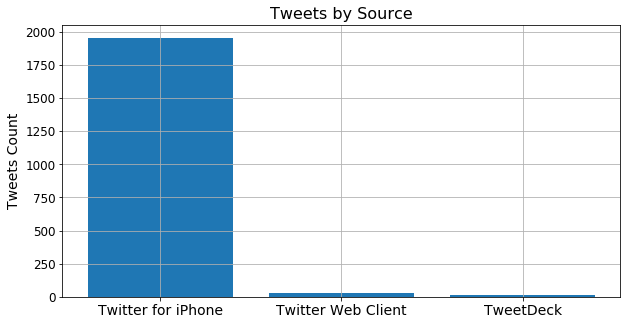

In [51]:
#Plotting the tweets by sources

plt.figure(figsize=(10,5))
plt.bar(df1['source'],df1['count'])
plt.grid(b=None)
plt.title('Tweets by Source', fontsize=16)
plt.yticks(fontsize=12)
plt.ylabel('Tweets Count',fontsize=14)
plt.xticks(fontsize=14)
plt.savefig('twt_source.png');

### Tweets generated by hours of the day

In [52]:
# Preparing a dataframe for analysis of tweets generated by hours of the day

time_data=tweeter_archieve_clean.copy()
time_data['twt_time']=time_data['timestamp'].apply(lambda x:datetime.datetime.strftime(x,"%H:%M:%S"))
time_data['twt_hr']=pd.to_datetime(time_data['twt_time']).dt.round('H').dt.hour
tm=time_data[['twt_hr','tweet_id']].groupby(['twt_hr'],as_index=False).count()

In [53]:
# A list of all 24 hours of the day for performing left join
hr_lbl=[]

for i in range(24):
    hr_lbl.append(i)
    
hr_df=pd.DataFrame(hr_lbl,columns=['hr_lbl'])

In [54]:
# Joining the 2 dataframes to get the counts of tweets for all 24 hrs of the day

tm=tm.merge(hr_df,how='right',left_on='twt_hr',right_on='hr_lbl')
tm['hr_lbl']=tm['hr_lbl'].apply(lambda x:'0'+str(x) if len(str(x))==1 else str(x))
tm['tweet_id']=tm['tweet_id'].apply(lambda x:0 if np.isnan(x) else int(x))
tm.rename(columns={'tweet_id':'tweet_cnt'},inplace=True)
tm=tm.sort_values('hr_lbl').reset_index()
tm=tm.drop(columns=['index'],axis=1)

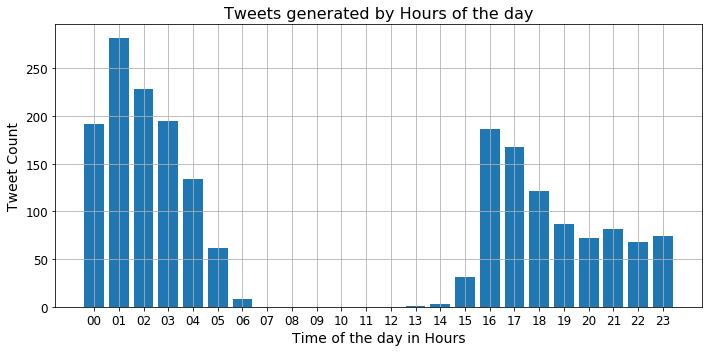

In [55]:
#Plotting the tweets generated during the hours of a day

plt.figure(figsize=(10,5))
plt.bar(tm['hr_lbl'],tm['tweet_cnt'])
plt.xlabel('Time of the day in Hours',fontsize=14)
plt.ylabel('Tweet Count',fontsize=14)
plt.title('Tweets generated by Hours of the day', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(b=None)
plt.tight_layout()
plt.savefig('tweets_by_hrs.png');

### Analysis of Retweets and Favorites pattern

In [56]:
# Creating a dataframe for analysis of retweets and favorites counts

twt_info=tweeter_archieve_clean[['timestamp','retweet_count','favorite_count']].copy()
twt_info['twt_day']=twt_info['timestamp'].apply(lambda x:datetime.datetime.strftime(x,'%d-%b-%Y'))
twt_info=twt_info[['twt_day','retweet_count','favorite_count']].groupby('twt_day').sum().reset_index()
twt_info['twt_mth']=twt_info['twt_day'].apply(lambda x:pd.to_datetime(x).strftime('%b-%Y'))
twt_info['twt_day']=twt_info['twt_day'].apply(lambda x:pd.to_datetime(x))
twt_info=twt_info.sort_values(by='twt_day').reset_index()
twt_info=twt_info.drop(columns=['index'])

In [57]:
twt_fav=twt_info.groupby('twt_mth',as_index=False).sum()[['twt_mth','favorite_count','retweet_count']]
twt_fav['mth_strt']=twt_fav['twt_mth'].apply(lambda x:datetime.datetime.strptime(x,'%b-%Y'))
twt_fav=twt_fav.sort_values(by='mth_strt').reset_index().drop('index',axis=1)

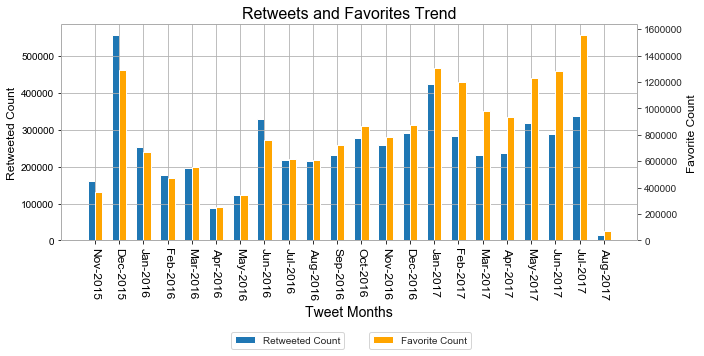

In [58]:
# Plotting the Retweets and Favorites Trend

ind=np.arange(len(twt_fav['twt_mth']))
wdth=0.3

fig=plt.figure(figsize=(10,5))
ax0=fig.add_axes([0.1,0.3,0.8,0.6])
sns.set_style('whitegrid')
plt.title(label='Retweets and Favorites Trend',fontsize=16)
ax0.bar(ind,twt_fav['retweet_count'],width=wdth,label='Retweeted Count')
ax0.set_xlabel('Tweet Months',fontsize=14)
ax0.set_ylabel('Retweeted Count',color='black',fontsize=12)
ax0.set_xticklabels(labels=twt_fav['twt_mth'],rotation=270,fontsize=12)
ax0.grid(b=None)

ax1=ax0.twinx()
ax1.bar(ind+wdth,twt_fav['favorite_count'],width=wdth,color='orange',label='Favorite Count')
ax1.set_ylabel('Favorite Count',color='black',fontsize=12)
loc=ind+wdth/2
plt.xticks(loc,twt_fav['twt_mth'])

plt.legend()
ax0.legend(loc='best',bbox_to_anchor=(0.5,-0.4))
ax1.legend(loc='best',bbox_to_anchor=(0.72,-0.4))
ax1.grid(b=None)
plt.savefig('retwts_and_favs.png');

### Analysis of tweets by day and hour

In [59]:
# Creating a dataframe

twt_day_tm=time_data[['tweet_id','timestamp','favorite_count','retweet_count','twt_hr']].copy()
twt_day_tm['twt_day']=twt_day_tm['timestamp'].apply(lambda x:datetime.datetime.strftime(x,'%A'))
twt_day_tm['twt_day_nbr']=twt_day_tm['timestamp'].apply(lambda x:datetime.datetime.strftime(x,'%w'))
twt_day_tm=twt_day_tm[['tweet_id','twt_day_nbr','twt_hr','twt_day']].groupby(['twt_hr','twt_day','twt_day_nbr'],as_index=False).count().sort_values(by=['twt_day_nbr','twt_hr'])
twt_data=twt_day_tm[['twt_day','twt_hr','tweet_id','twt_day_nbr']].sort_values(by=['twt_day_nbr','twt_hr'])

In [60]:
# Sort order by the day of the week 
sort_ord=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']

In [61]:
# Creating a pivot table format to plot a heatmap

twt_pvt=twt_data.pivot('twt_day','twt_hr','tweet_id')
twt_pvt=twt_pvt.reindex(sort_ord)

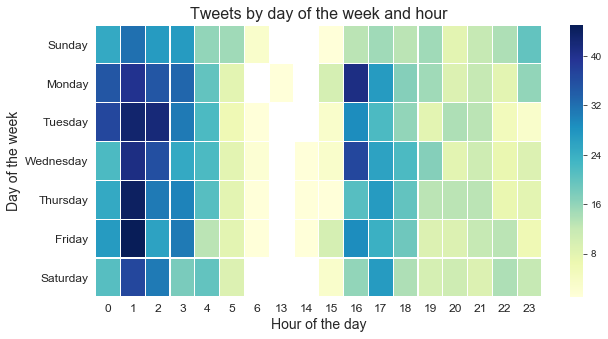

In [62]:
# Plotting the heatmap

fig=plt.figure(figsize=(10,5))
sns.heatmap(twt_pvt,mask=False,cmap="YlGnBu",linecolor='white',linewidth=0.2)
plt.title('Tweets by day of the week and hour',fontsize=16)
plt.xlabel('Hour of the day',fontsize=14)
plt.ylabel('Day of the week',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('twts_by_day_hr.png');